## Code along- overfitting and underfitting
- Simulate data

$y= a_0 + a_1x + a_2x^2 + \epsilon$

where $\epsilon \sim \mathcal{N}(0,1)$ (the error is standard normal distrubuted)

In [9]:
import numpy as np
import matplotlib.pyplot as plt

In [15]:
samples = 100
X= np.random.uniform(-3, 3, (samples, 1))
X

array([[-2.07358979],
       [-0.47304496],
       [ 1.67280501],
       [-1.0005788 ],
       [ 0.85296662],
       [ 2.76714894],
       [ 2.6664031 ],
       [ 0.721527  ],
       [ 1.19800604],
       [ 0.48669111],
       [-1.5763917 ],
       [-1.40473247],
       [-2.74326064],
       [ 1.67935581],
       [-1.58554631],
       [ 0.4389168 ],
       [-1.34650228],
       [-0.06020697],
       [ 1.17170802],
       [ 2.84094266],
       [ 2.03492228],
       [-0.25658593],
       [-0.04889029],
       [ 0.19625046],
       [-1.98584478],
       [ 2.27620842],
       [-0.62240739],
       [-1.3852857 ],
       [ 2.72815367],
       [ 0.10198262],
       [ 1.60435009],
       [ 1.8499705 ],
       [-0.83669181],
       [ 2.10283772],
       [-1.9830772 ],
       [ 1.37255386],
       [ 1.79375956],
       [ 0.12781487],
       [-2.94847691],
       [-1.60458904],
       [-1.02088073],
       [ 0.48184707],
       [-1.49530614],
       [ 2.02750923],
       [-0.42802144],
       [-1

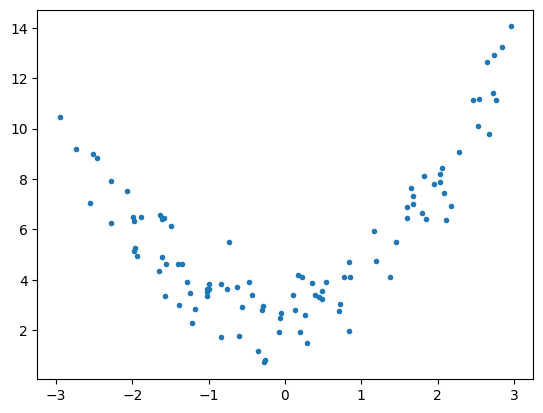

In [17]:
# a0 = 3, a1 = 0.5, a2 = 1
f= lambda x: x**2 + 0.5*x + 3
y= f(X) + np.random.randn(samples, 1)


x= np.linspace(-3, 3, samples)
plt.plot(X,y, ".")